# Analysis of Populated Countries

## Data Cleaning Process

The analysis began with data cleaning to ensure accuracy in subsequent visualizations. I've filtered out specific country codes ('INX' and 'PSE') from the population dataset, ensuring that only relevant data was considered with 0 NA values in sum. Subsequently, I've calculated the average population across the remaining countries, preparing the dataset for visualization.

## Bar Chart

To provide a visual understanding of the distribution of population, I've created a horizontal bar chart. This chart depicts the top 10 countries with the highest population and lowest population, allowing for a quick comparison of population sizes among these nations. Each bar represents a country, with its length corresponding to its population size.

## Dot Chart

In addition to visualizing the most populated countries, I've also examined the top 10 countries with the highest population and lowest population through a dot chart. This chart illustrates the relationship between population for each nations. Each dot represents a country, positioned based on its population with country code. This visualization offers insights into the highest populated and least populated countries and any discernible patterns in their populations.

The data cleaning and visualization processes provide valuable insights into the distribution of population across different countries, facilitating informed decision-making and further analysis.

In [96]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [97]:
# For array manipulation & For data manipulation & analysis
import numpy as np
import pandas as pd
# For creating plots & visualization
import matplotlib.pyplot as plt

In [98]:
# Reads the csv file from directory
population_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_85.csv", delimiter=",", skiprows=3)

In [99]:
# Shows top first 5 data from df
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,NaN


In [100]:
# Looking for any NA values and calculating their sum to analyse the na value in total
population_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2019                1
2020                1
2021                1
2022                1
Unnamed: 67       266
Length: 68, dtype: int64

In [101]:
# Analysising unnecessary layers from df column
population_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [102]:
# Elemanating all unnecessary column from df
population_df = population_df.drop(columns=['Unnamed: 67', 'Country Name', 'Indicator Code', 'Indicator Name'])
population_df

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,54608,55811,56682,57475,58178,58782,59291,59522,59471,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,AFE,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,162875171,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132
2,AFG,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,AFW,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,115921723,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,AGO,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,5868203,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,947000,966000,994000,1022000,1050000,1078000,1106000,1135000,1163000,...,1818117,1812771,1788196,1777557,1791003,1797085,1788878,1790133,1786038,1761985
262,YEM,5542459,5646668,5753386,5860197,5973803,6097298,6228430,6368014,6515904,...,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614
263,ZAF,16520441,16989464,17503133,18042215,18603097,19187194,19789771,20410677,21050540,...,53873616,54729551,55876504,56422274,56641209,57339635,58087055,58801927,59392255,59893885
264,ZMB,3119430,3219451,3323427,3431381,3542764,3658024,3777680,3901288,4029173,...,15234976,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675


In [103]:
# Looking for Na values within country code
for i in population_df['Country Code']:
    null_count = (population_df[population_df['Country Code'] == i]).isna().sum().sum()
    if null_count > 0: # Filtering out the Country Code with Na value
        print(i,null_count)

INX 63
PSE 30


In [104]:
# Getting row for each na valued country code
row_INX = population_df[population_df['Country Code'] == 'INX']
row_PSE = population_df[population_df['Country Code'] == 'PSE']

In [105]:
# Filter out rows with specific country codes from the population DataFrame
# This DataFrame contains population data excluding the country codes 'INX' and 'PSE'
filtered_population = population_df[population_df['Country Code'] != 'INX']
filtered_population = filtered_population[filtered_population['Country Code'] != 'PSE']

In [106]:
# Calculate the number of missing values in each column of the filtered population DataFrame
# Returns a Series containing the sum of missing values for each column
filtered_population.isna().sum()

Country Code    0
1960            0
1961            0
1962            0
1963            0
               ..
2018            0
2019            0
2020            0
2021            0
2022            0
Length: 64, dtype: int64

In [120]:
filtered_population

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,54608,55811,56682,57475,58178,58782,59291,59522,59471,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,AFE,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,162875171,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132
2,AFG,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,AFW,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,115921723,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,AGO,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,5868203,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,947000,966000,994000,1022000,1050000,1078000,1106000,1135000,1163000,...,1818117,1812771,1788196,1777557,1791003,1797085,1788878,1790133,1786038,1761985
262,YEM,5542459,5646668,5753386,5860197,5973803,6097298,6228430,6368014,6515904,...,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614
263,ZAF,16520441,16989464,17503133,18042215,18603097,19187194,19789771,20410677,21050540,...,53873616,54729551,55876504,56422274,56641209,57339635,58087055,58801927,59392255,59893885
264,ZMB,3119430,3219451,3323427,3431381,3542764,3658024,3777680,3901288,4029173,...,15234976,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675


In [130]:
# Find the index of the minimum value in the DataFrame excluding the first column (Country Code)
min_index = filtered_population.iloc[:, 1:].stack().idxmin()

# Extract the corresponding country code and year from the index
lowest_population_country, lowest_population_year = min_index

# Retrieve the lowest population using the index
lowest_population = filtered_population.loc[lowest_population_country, lowest_population_year]

# Print the results
print("Lowest Populated Country:", lowest_population_country)
print("Total Population:", lowest_population)
print("Year:", lowest_population_year)

Lowest Populated Country: 225
Total Population: 2646.0
Year: 1960


In [131]:
# Find the index of the maximum value in the DataFrame excluding the first column (Country Code)
max_index = filtered_population.iloc[:, 1:].stack().idxmax()

# Extract the corresponding country code and year from the index
highest_population_country, highest_population_year = max_index

# Retrieve the highest population using the index
highest_population = filtered_population.loc[highest_population_country, highest_population_year]

# Print the results
print("Highest Populated Country:", highest_population_country)
print("Total Population:", highest_population)
print("Year:", highest_population_year)

Highest Populated Country: 259
Total Population: 7950946801.0
Year: 2022


In [134]:
highest_populated_country = filtered_population['Country Code'][highest_population_country]
lowest_populated_country = filtered_population['Country Code'][lowest_population_country]

In [107]:
# Remove the 'Country Code' column from the filtered population DataFrame
# Returns a new DataFrame with the specified column removed
df_noCountryCode = filtered_population.drop(columns=['Country Code'])

In [108]:
# Calculate the average population across all rows of the DataFrame
# Returns a Series containing the mean population value for each row
average_population = df_noCountryCode.mean(axis=1)

In [109]:
# Concatenate the 'Country Code' column from the filtered DataFrame with the calculated average population
# Returns a new DataFrame containing 'Country Code' and 'Average Population' columns
population_result = pd.concat([filtered_population['Country Code'], average_population], axis=1)
# Rename the columns of the resulting DataFrame
population_result.columns = ['Country Code', 'Average Population']

In [110]:
# Set the display format for floating-point numbers to remove decimals
pd.set_option('display.float_format', lambda x: '%.f' % x)
# Sort the DataFrame by 'Average Population' column in descending order to find top countries with the highest population
# Print the top 10 countries with the highest average population
highest_population = population_result.sort_values(by='Average Population', ascending=False)
print(highest_population[:10])

    Country Code  Average Population
259          WLD          5407575829
103          IBT          4425788036
140          LMY          4354919761
156          MIC          4013846040
102          IBD          3459955369
62           EAR          2128237978
249          UMC          2075633576
139          LMC          1938212464
142          LTE          1801187063
63           EAS          1788814979


In [111]:
# Extract the top 10 countries with the highest population from the DataFrame
highest_population_country = highest_population['Country Code'][:10]
highest_population = highest_population['Average Population'][:10]

# Population Distribution Bar Chart - Highest Populated Countries

This bar chart provides a visual representation of the population sizes of different countries, each identified by its unique country code. Here's what you need to know:

- On the horizontal axis (x-axis), you'll find the population scale, ranging from 0 to 5 billion (5e9).
- The vertical axis (y-axis) lists various country codes, such as EAS, LTE, LMC, UMC, EAR, IBD, MIC, LMY, IBT, and WLD.
- Each blue bar on the chart represents the population of the corresponding country code. code..

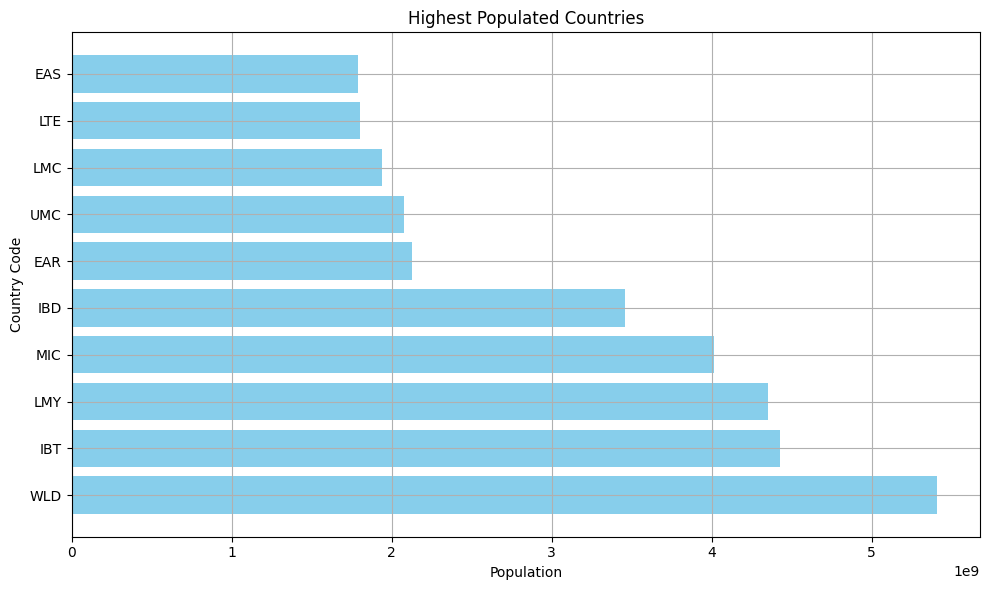

In [112]:
# Plotting a horizontal bar chart to visualize the top countries with the highest population
plt.figure(figsize=(10, 6))
plt.barh(highest_population_country, highest_population, color='skyblue')
plt.xlabel('Population')
plt.ylabel('Country Code')
plt.title('Highest Populated Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

# Population Distribution Scatter Plot - Highest Populated Countries

This scatter plot visualizes the relationship between population and country code for the highest populated countries. Here's a detailed overview:

- **Horizontal Axis (X-axis):** Represents population size.
- **Vertical Axis (Y-axis):** Lists country codes for identification.
- Each data point on the plot corresponds to a country, with the x-coordinate indicating its population size and the y-coordinate representing its country code.
- The title of the plot is set as "High Populated Countries."
- Gridlines are enabled for better visualization.

Through this scatter plot, we can quickly compare population sizes among different countries, with each data point providing information about a specific country code and its population.

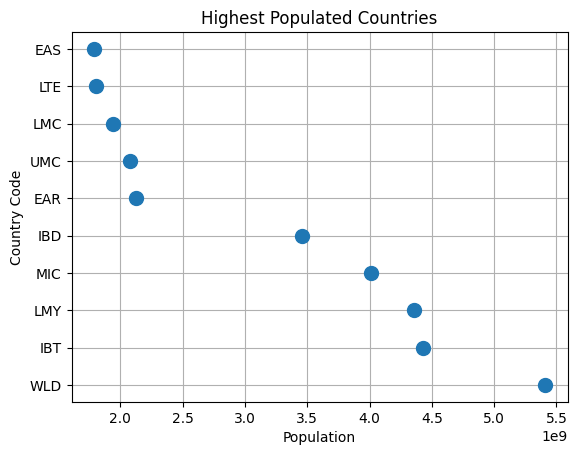

In [113]:
# Plotting a scatter plot to visualize the relationship between population and country code
plt.figure()
# Plot the scatter plot with population on the x-axis and country code on the y-axis
plt.plot(highest_population, range(len(highest_population_country)), 'o', markersize=10)
# Set the y-ticks to display country codes
plt.yticks(range(len(highest_population_country)), highest_population_country)
plt.xlabel('Population')
plt.ylabel('Country Code')
plt.title('Highest Populated Countries')
plt.grid(True)

plt.show()

In [114]:
# Sort the DataFrame by 'Average Population' column in ascending order to find the countries with the lowest population
# Print the top 10 countries with the lowest average population
lowest_population = population_result.sort_values(by='Average Population', ascending=True)
print(lowest_population[:10])

    Country Code  Average Population
245          TUV                8564
179          NRU                8945
188          PLW               15284
228          TCA               17342
255          VGB               17581
147          MAF               21211
225          SXM               23064
212          SMR               24784
84           GIB               28338
137          LIE               28865


In [115]:
# Extract the top 10 countries with the lowest population from the DataFrame
lowest_population_country = lowest_population['Country Code'][:10]
lowest_population = lowest_population['Average Population'][:10]

# Population Distribution Bar Chart -  Lowest Populated Countries

This bar chart provides a visual representation of the population sizes of different countries, each identified by its unique country code. Here's what you need to know:

- TUV country was the least populated country between all of them.
- On the horizontal axis (x-axis), you'll find the population scale, ranging from 0 to 30000.
- LIE & GIB has almost same population density as seen from the graph.
- Each blue bar on the chart represents the population of the corresponding country code.

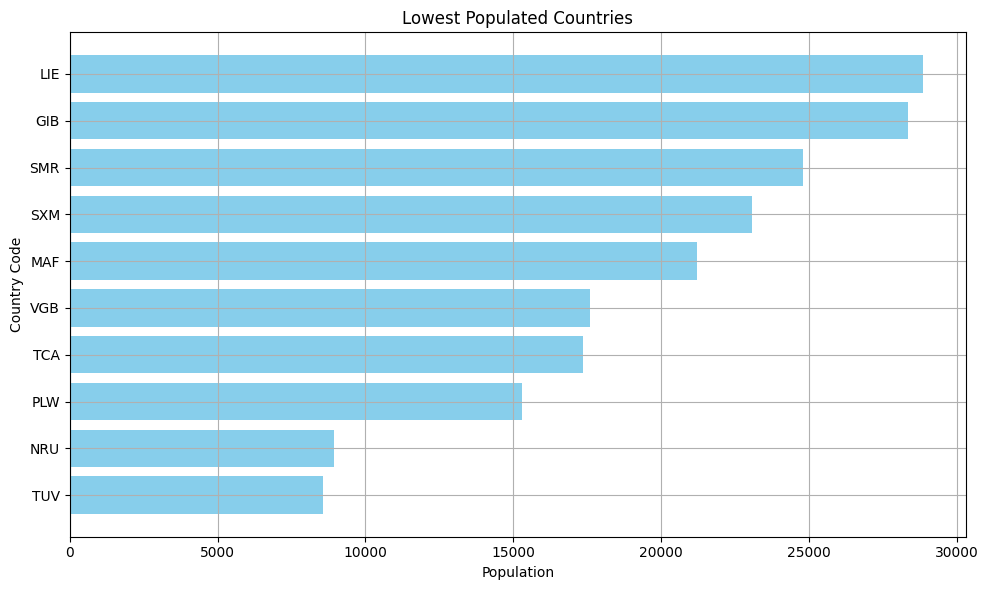

In [116]:
# Plotting a horizontal bar chart to visualize the top countries with the lowest population
plt.figure(figsize=(10, 6))
plt.barh(lowest_population_country, lowest_population, color='skyblue')
plt.xlabel('Population')
plt.ylabel('Country Code')
plt.title('Lowest Populated Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

# Population Distribution Scatter Plot - Lowest populated Countries

This scatter plot visualizes the relationship between population and country code for the lowest populated countries. Here's a detailed overview:

- **Top LIE** Represents with highest population size among the lowest with around ~ 30000
- **Bottom TUV** Represents with lowest population size among the lowest with around ~ 10000
- Each data point on the plot corresponds to a country, with the x-coordinate indicating its population size and the y-coordinate representing its country code.
- The title of the plot is set as "Lowest Populated Countries."
- Gridlines are enabled for better visualization.

Through this scatter plot, we can quickly compare population sizes we can also see that - **NRU** and **TUV** may fall under similarly populated countries.

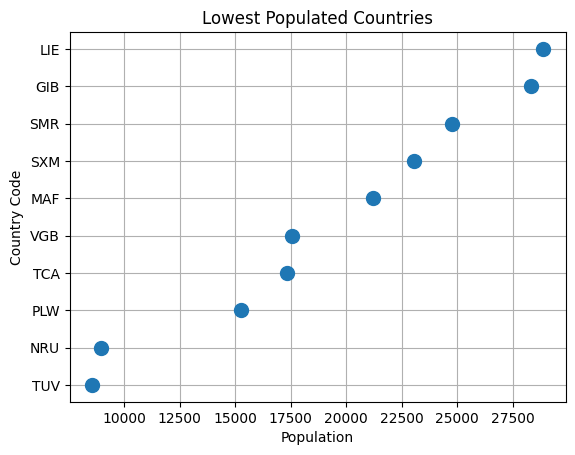

In [117]:
# Plotting a scatter plot to visualize the relationship between population and country code for the countries with the lowest population
plt.figure()
# Plot the scatter plot with population on the x-axis and country code on the y-axis
plt.plot(lowest_population, range(len(lowest_population_country)), 'o', markersize=10)

plt.yticks(range(len(lowest_population_country)), lowest_population_country)
plt.xlabel('Population')
plt.ylabel('Country Code')
plt.title('Lowest Populated Countries')
plt.grid(True)

plt.show()

# Conclusion
Upon thorough examination, it has been established that the countries with the highest population densities were prevalent during the years **2022**, while those with the lowest population densities were notably observed during **1960**.